# DTEK0042 Exercise 2
    Group Members:
    1. Olivia "Oukka" Oukka
    2. Svante "S-man" Södergård
    3. Jani "Norppa" Norrby

*** Note for Google Colab Users ***
     Because Google Colab doesn't have a button to convert your notebook to .html format here is a quick work around:
   1. open a new google colab notebook
   2. in the files section in google colab, upload the .ipynb file you want to be converted to .html
   3. in your new open notebook run this command in an empty cell: !jupyter nbconvert --to html YourFileName.ipynb
   4. after the command is finished running refresh the page
   5. In your files section you should see your original .ipynb file that you uploaded and then a .html file of that same notebook.
   6. download the .html file and you're good to go!

In this exercise, you are required to analyze an ECG signal step-by-step as outlined below. The deliverables for this exercise are a jupyter notebook in both .ipynb and .html format. Please provide caption for every figure and include description for every figure.

## library Imports

In [ ]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

# Data Import and plotting
* Import the ECG signal named “ECG_800Hz.txt” into your python environment and store it in a variable named “ECG_sig”.
* Plot the signal
* Note: the sampling frequency of this signal is 800Hz.
* You need this value if you want to plot ECG versus time.


     HINT: ECG_sig = np.loadtxt(the directory of the ECG signal)
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt     https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html

Shape of ECG signal:  (700001,)


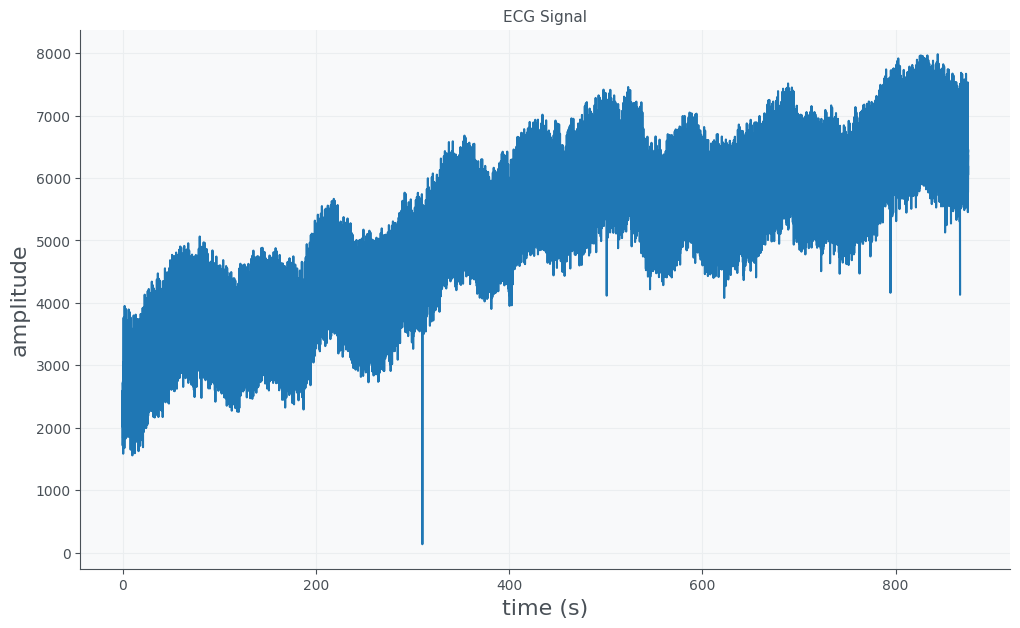

In [ ]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

ECG_sig = np.loadtxt('/content/ECG_800hz.txt')
Fs = 800
t = np.arange(ECG_sig.size) / Fs
print("Shape of ECG signal: ", ECG_sig.shape)
plt.figure(figsize=(12,7))
plt.plot(t, ECG_sig)
plt.title("ECG Signal")
plt.xlabel("time (s)", fontsize = 16)
plt.ylabel("amplitude", fontsize = 16)
plt.show()

# Discrete Fourier Transform

 * Compute DFT using FFT algorithm provided by scipy package. Take only the positive frequencies from the computed DFT and subsequently calculate the magnitude (absolute value) of frequency content. Plot the calculated magnitude versus frequency.
 * Discard the frequencies below 0.5Hz and above 40Hz and replot the magnitude versus frequency.


     * HINT use scipy.fft.rfft() outputs positive portion of function
     
     https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.rfft.html
     https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.rfftfreq.html
     

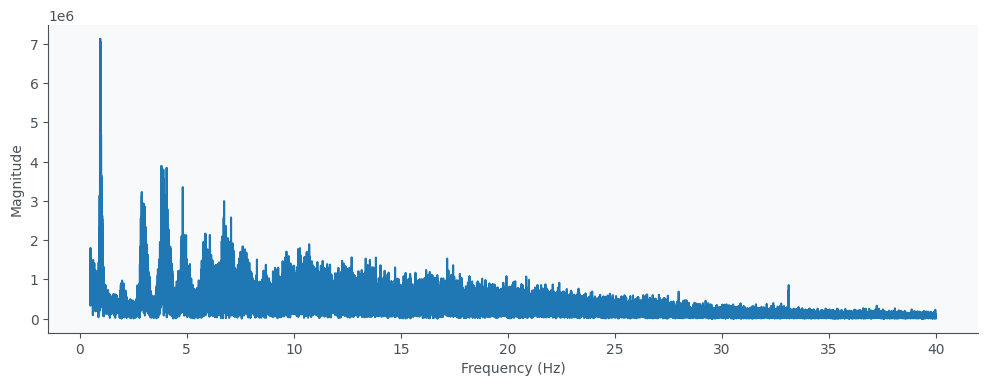

In [ ]:

rfft_sig = sp.fft.rfft(ECG_sig)
n = ECG_sig.size
freqs = sp.fft.rfftfreq(n, d=1./Fs)

plt.figure(figsize=(12, 4))
plt.plot(freqs[(freqs>0.5) & (freqs<40)], abs(rfft_sig)[(freqs>0.5) & (freqs<40)])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid()
plt.show()


# Band Pass Filter Design
*  Design a band pass filter. Use Butterworth filter of order 4 with cutoff frequencies equal to 0.5Hz and 40Hz.


* Design another butterworth band pass filter but this time use an order of 2 with cutoff frequencies equal to 0.5Hz and 40Hz


* Plot the frequency response of both filters and explain your observations


    * Hint use the following three functions scipy.signal.butter() and scipy.signal.freqz()


* Important to use the scipy.signal.freqz() function and NOT the scipy.signal.freqs() function.

        scipy.signal.freqz() is for digital filters which is what we want.

https://docs.scipy.org/doc/scipy/reference/signal.html#filtering link to info about scipy.signal functions

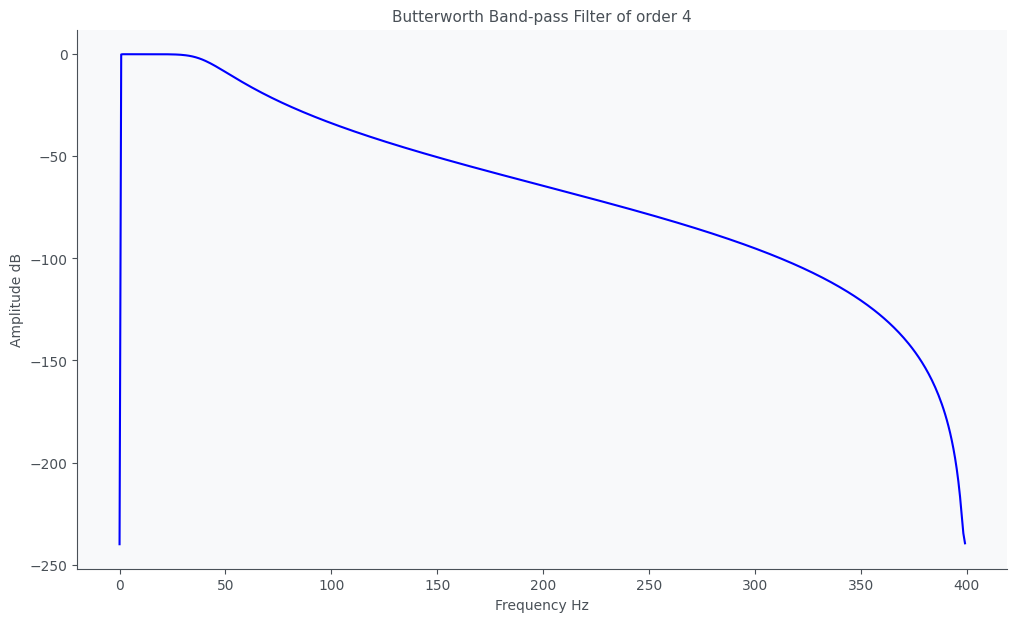

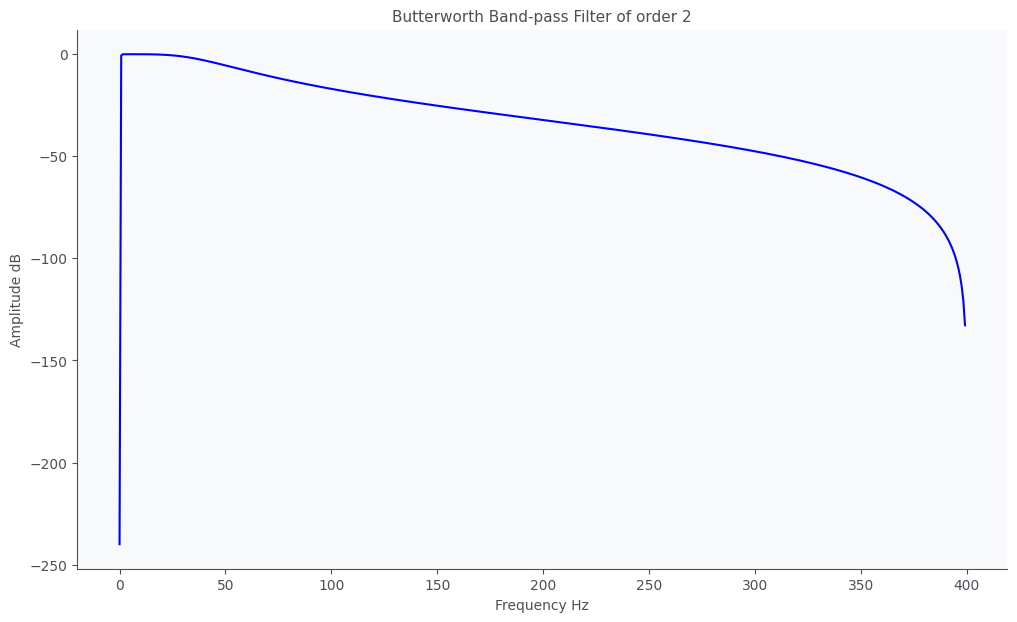

In [ ]:
#Butterworth filter for order 4
b, a = sp.signal.butter(4, [0.5, 40], btype = 'bandpass', analog = False, fs=Fs)
w, h = sp.signal.freqz(b, a, fs=Fs)
plt.figure(figsize=(12,7))
plt.plot(w, 20 * np.log10(abs(h) + 1e-12), 'b') #amplitude to decibels with avoiding of 0
plt.title('Butterworth Band-pass Filter of order 4')
plt.xlabel('Frequency Hz')
plt.ylabel('Amplitude dB')
plt.grid()
plt.show()

#Butterworth filter for order 2

d, c = sp.signal.butter(2, [0.5, 40], btype = 'bandpass', analog = False, fs=Fs)
w1, h1 = sp.signal.freqz(d, c, fs=Fs)
plt.figure(figsize=(12,7))
plt.plot(w1, 20 * np.log10(abs(h1) + 1e-12), 'b')
plt.title('Butterworth Band-pass Filter of order 2')
plt.xlabel('Frequency Hz')
plt.ylabel('Amplitude dB')
plt.grid()
plt.show()

## Observations: The filters frequency response in the pass band is 0. After 40 hertz, the filters start to attenuate the frequencies which are stronger. The order 4 filter attenuates more frequencies than the order 2 filter.

# Apply filter to ECG_Sig
* Use the designed 4th order filter to filter ECG_sig and plot the first 5000 samples from the original signal (raw_signal) and the filtered signal.
* What happens after filtering?
* Explain your observations

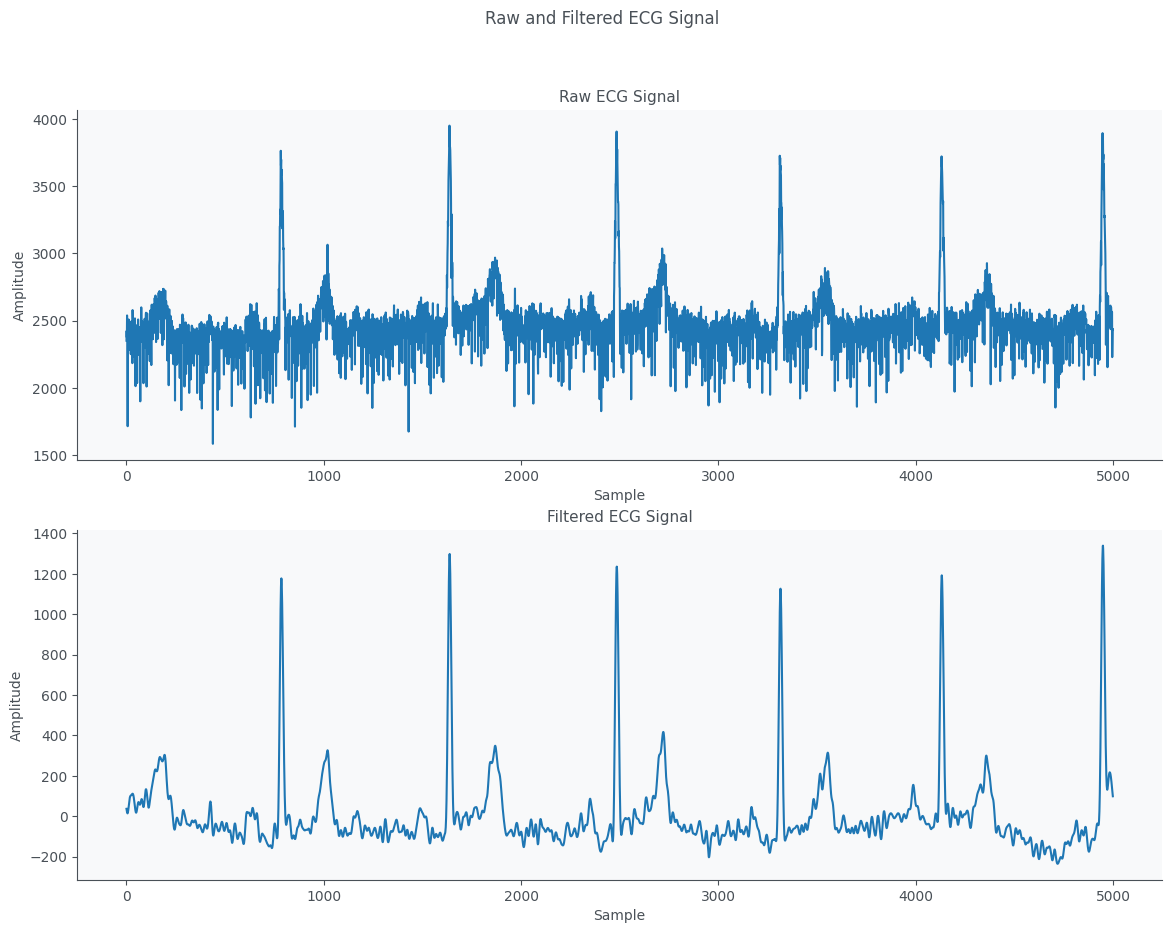

In [38]:
#Butterworth filter for order 4
filtered_ecg_signal = sp.signal.filtfilt(b, a, ECG_sig[:5000])

# plt.figure(figsize=(12,7))
# plt.plot(filtered_ecg_signal)
# plt.title('Filtered ECG Signal')
# plt.xlabel('Sample')
# plt.ylabel('Amplitude')
# plt.show()

# plt.figure(figsize=(12,7))
# plt.plot(ECG_sig[:5000])
# plt.title('Raw ECG Signal')
# plt.xlabel('Sample')
# plt.ylabel('Amplitude')
# plt.show()


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))
fig.suptitle('Raw and Filtered ECG Signal')
ax1.plot(ECG_sig[:5000])
ax2.plot(filtered_ecg_signal)
for ax in (ax1, ax2):
    ax.set(xlabel='Sample', ylabel='Amplitude')
    ax.grid()

ax1.set_title('Raw ECG Signal')
ax2.set_title('Filtered ECG Signal')
fig.show()

## Observations:

The signal is cleaned up by the filter and some of the artifacts and noise is getting reduced. The signal still has some elements that could be filtered out but it has much clearer peaks and elements that you would usually want to have in an ECG signal.

# Plot the frequency domain of raw and filtered signal
* Plot raw and filtered signals in the frequency domain and explain your observations
* For each signal select frequencies from 0 to 50Hz

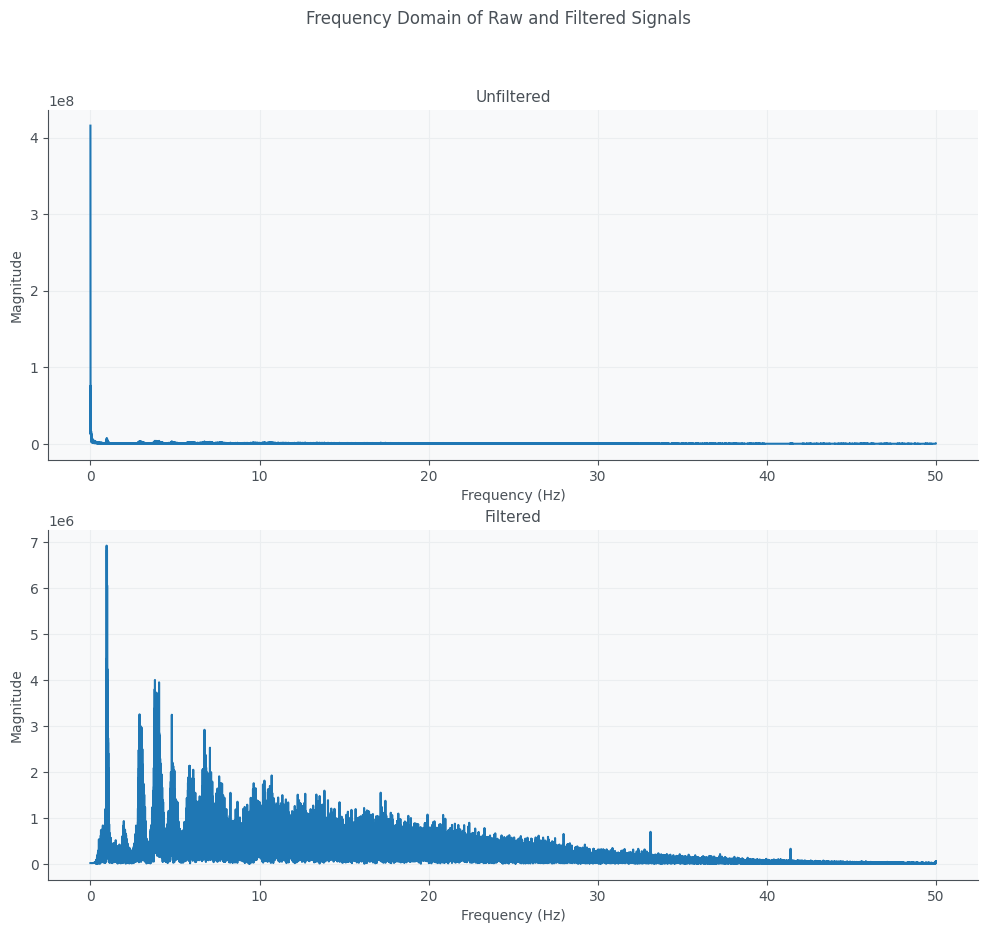

In [27]:
# plt.figure(figsize=(12, 4))
# plt.plot(freqs[(freqs>0.5) & (freqs<40)], abs(rfft_sig[(freqs>0.5) & (freqs<40)]))
# plt.xlabel('Frequency (Hz)')
# plt.ylabel('Magnitude')
# plt.grid()
# plt.show()

filtered_ecg_signal_full = filtered_ecg_signal = sp.signal.filtfilt(b, a, ECG_sig)

filtered_rfft_sig = sp.fft.rfft(filtered_ecg_signal_full)
filtered_n = filtered_ecg_signal_full.size
filtered_freqs = sp.fft.rfftfreq(n, d=1./Fs)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
fig.suptitle('Frequency Domain of Raw and Filtered Signals')
ax1.plot(freqs[(freqs>0) & (freqs<50)], abs(rfft_sig[(freqs>0) & (freqs<50)]))
ax2.plot(filtered_freqs[(filtered_freqs>0) & (filtered_freqs<50)], abs(filtered_rfft_sig[(filtered_freqs>0) & (filtered_freqs<50)]))

for ax in (ax1, ax2):
    ax.set(xlabel='Frequency (Hz)', ylabel='Magnitude')

ax1.set_title('Unfiltered')
ax2.set_title('Filtered')

ax1.grid(visible=True, which='minor', axis='both')
ax2.grid(visible=True, which='minor', axis='both')
fig.show()

## Observations:

# QRS Detection
*  QRS detection using “hamilton” method provided by the “biosppy” package.
*  If you do not have this package installed, use the following command to install it  !pip install biosppy in the next cell
* For google colab use following command in the cell as well: !pip install biosppy


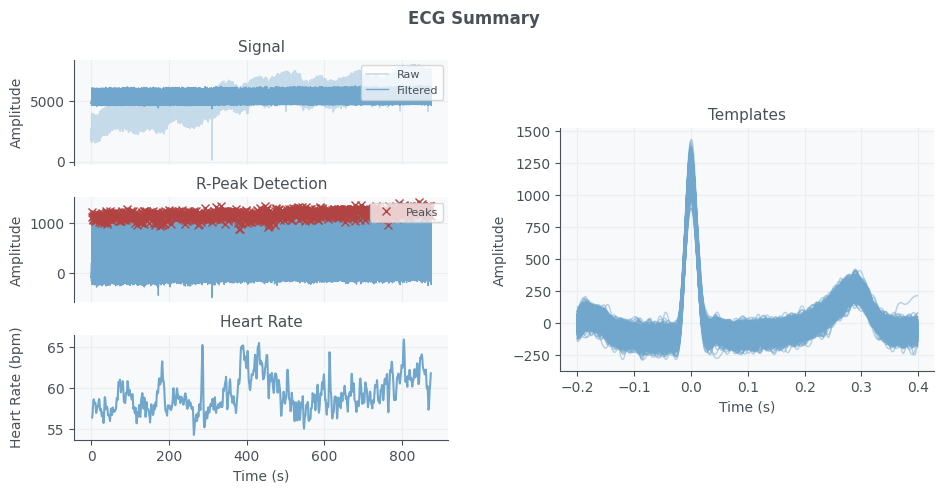

In [29]:
# Install both biosppy and its dependency peakutils
!pip install biosppy peakutils

# Import the required libraries
import biosppy
from biosppy.signals import ecg

# Now you can use the ecg function
out = ecg.ecg(signal=ECG_sig, sampling_rate=Fs, show=True)

## Observations: